In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/captures/Capture.PNG
/kaggle/input/capture-1/Capture1.PNG
/kaggle/input/wine-data/Wine.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Principal Component Analysis(PCA):

<font color="blue">
It can be used as a dimensionality reduction method, which can help to minimize the number of the variables (or columns of a data frame) without losing much of the original information. This is useful especially when you are building machine learning models based on the data with many variables like 100s or 1000s.


While regression determines a line of best fit to a dataset, factor analysis or principal component analysis determines several orthogonal lines of best fit to the dataset.Orthogonal means at right angles. The lines are perpendicular to each other in n dimensional space where n dimensional space is the variable sample space. There as many dimensions as there are variables,i.e., a dataset with 4 variables the sample space is 4 dimensionals.
    

If we use this technique on a dataset with large numbers of variables, we can compress the amount of explained variation to just a few components.


PCA is just a transformation of our data and attempts to find out what features excplain the most variance in our data
    

We try to get rid of the components that do not explain enough the variance in our data.

In [3]:
df = pd.read_csv("../input/wine-data/Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

<font color="blue">
In this dataset, there are 14 dimensions or variables, thus it is difficult to visualize all of them. We can utilize PCA to learn the two most important components of the data and visualize the data in this new two dimensional space.

<font color="blue">
We need to apply PCA before applying machine learning algorithm.

We should also apply it to the features, not to the target value"Customer Segment" in this dataset.

In [5]:
from sklearn.model_selection import train_test_split
X=df.drop("Customer_Segment",axis=1).values
y=df["Customer_Segment"].values

In [6]:
X_train, X_test, y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=42)

<font color="blue">
Before we use PCA in the data, we need to standartize the variables by using standart scaler of sklearn.

Standart Scaler transformed our data into a numpy array and standartized all of the variables of the data

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<font color="blue">
Now at this point we can apply PCA:

In [8]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)# we make an instance of PCA and decide how many components we want to have
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [9]:
print(X_train.shape) # As we can see, we have reduced feature into 2 main features
print(X_test.shape)

(142, 2)
(36, 2)


Text(0, 0.5, 'The Second Principal Component')

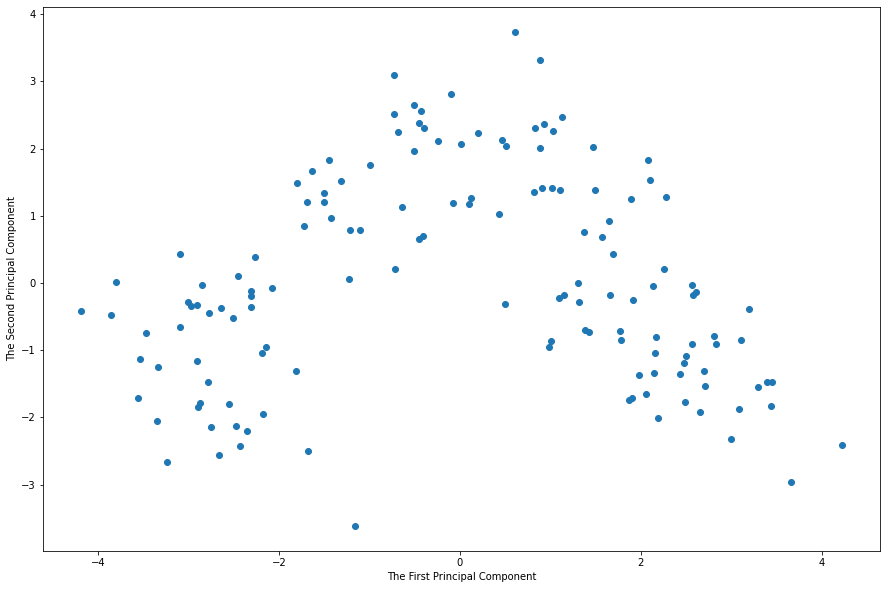

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(X_train[:,0],X_train[:,1],cmap="plasma")
plt.xlabel("The First Principal Component")
plt.ylabel("The Second Principal Component")
#Here we plot all the rows of columns 1 and column 2 in a scatterplot

In [11]:
pca.components_

array([[ 0.12753249, -0.25623655, -0.02236181, -0.24428137,  0.14757757,
         0.38490786,  0.41950095, -0.2992598 ,  0.30843734, -0.11907301,
         0.29949964,  0.38381622,  0.27587548],
       [-0.4928047 , -0.1904464 , -0.31676447,  0.03513857, -0.26217161,
        -0.09601687, -0.01513129, -0.07626286, -0.0738558 , -0.53396728,
         0.28133315,  0.14274046, -0.381054  ]])

In [12]:
df_comp=pd.DataFrame(pca.components_)
df_comp

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.127532,-0.256237,-0.022362,-0.244281,0.147578,0.384908,0.419501,-0.299260,0.308437,-0.119073,0.299500,0.383816,0.275875
1,-0.492805,-0.190446,-0.316764,0.035139,-0.262172,-0.096017,-0.015131,-0.076263,-0.073856,-0.533967,0.281333,0.142740,-0.381054


<font color="blue">
Each row represents actual componnents and each column relates back original features.

We can see the relationship better via a heatmap.

But first we need to transfor it into a dataframe in order to use the visualization libraries.

<AxesSubplot:>

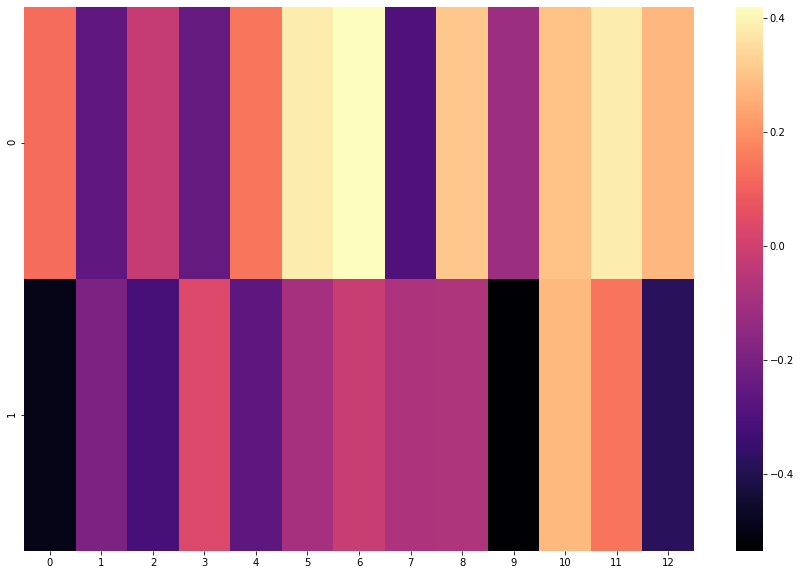

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df_comp,cmap="magma")

<font color="blue">
In this heatmap above, we see the relation between the principal components and actual features

The ligh color in the heatmap shows strong correlation between the principal components and actual features while dark colors show the opposite or negative correlation.

Actually the principal components are the combinations of all these features of the data.

After we get the principal components of the data, we can feed them into a machine learning algorithm because we have clear and separated components of the data instead of the complex variables.

For this data we do a logistic regression on tranformed_data instead of doing regression with the entire data.

Support vector machines can also be a good alternative for this data.

<font color="blue">
After applying PCA, we can implement our machine learning model as follows:

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
#We have %100 procent accuracy although we have just used the main components of the data

1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



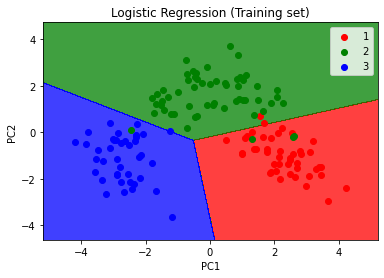

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
#This is performance of the algorithm with training set

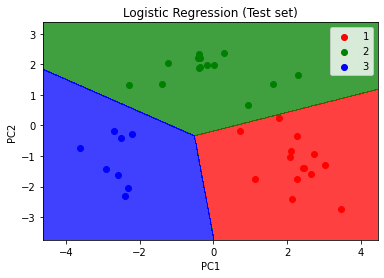

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
#This is visualization of performance of the algorithm with test set

<font color="blue">
It is obvious that we can get pretty good prediction by using just the two principal components of the data instead of using all of the dataset.

PCA can be very useful tool big data with many features.

## 2. Linear Discriminant Analysis (LDA):

<font color="blue">
The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs.

The general LDA approach is very similar to a Principal Component Analysis (for more information about the PCA,but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).

Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction. PCA can be described as an “unsupervised” algorithm, since it “ignores” class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset. In contrast to PCA, LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.

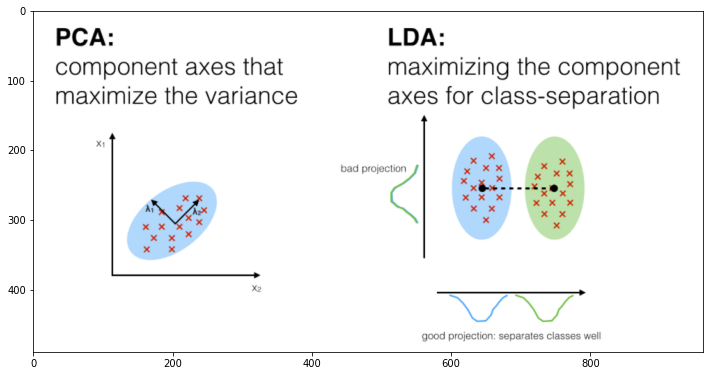

In [18]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("../input/captures/Capture.PNG"))

In [19]:
X_train, X_test, y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda =LDA(n_components=2) # we select the same number of components
X_train = lda.fit_transform(X_train,y_train) # we have to write both X_train and y_train
X_test = lda.transform(X_test)

In [21]:
print(X_train.shape)
print(X_test.shape)


(142, 2)
(36, 2)


<font color="blue">
Lets apply the same machine learning model

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



<font color="blue">
We get %100 accuracy when we apply  LinearDiscriminantAnalysis(LDA)

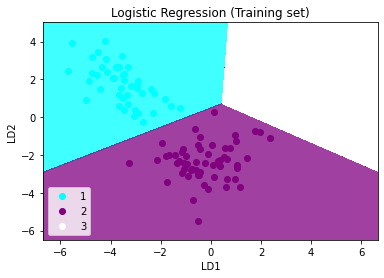

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'purple', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('cyan', 'purple', 'white'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()


<font color="blue">
LDA outperforms over the PCA when it comes to the performance in the training set, but they have the accuracy in the test set.

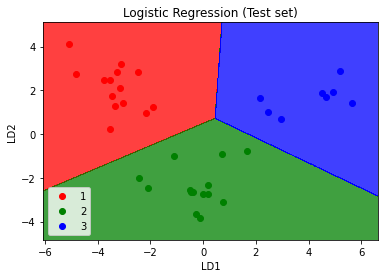

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## 3. Kernel PCA

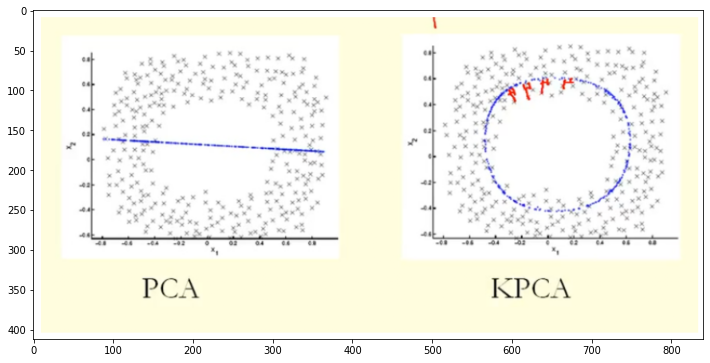

In [26]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("../input/capture-1/Capture1.PNG"))

<font color="blue">
Kernel methods seek higher dimension, while SVD seeks lower dimension.

From the comparison in the figure we can see that KPCA gets an eigenvector with higher variance (eigenvalue) than PCA.

Because for the the largest difference of the projections of the points onto the eigenvector (new coordinates), KPCA is a circle and PCA is a straight line, so KPCA gets higher variance than PCA. So does it mean KPCA gets higher principal components than PCA.

PCA (as a dimensionality reduction technique) tries to find a low-dimensional linear subspace that the data are confined to. 

Kernel PCA can find this non-linear manifold and discover that the data are in fact nearly one-dimensional.

It does so by mapping the data into a higher-dimensional space.The data are mapped into a higher-dimensional space, but then turn out to lie on a lower dimensional subspace of it. So you increase the dimensionality in order to be able to decrease it.

In [27]:
X_train, X_test, y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


<font color="blue">
Lets apply KPCA:

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.decomposition import KernelPCA
kpca= KernelPCA(n_components=2,kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [30]:
print(X_train.shape)
print(X_test.shape)

(142, 2)
(36, 2)


In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



<font color="blue">
All the of dimentionality analysis instruments has performed %100 accuracy. 

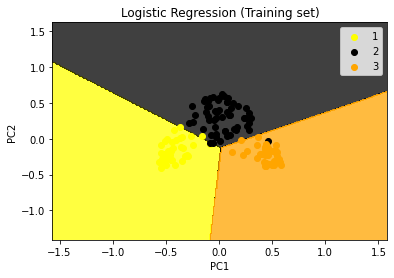

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'black', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('yellow', 'black', 'orange'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

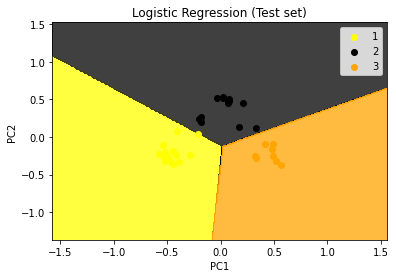

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'black', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('yellow', 'black', 'orange'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()